<a href="https://colab.research.google.com/github/shivampip/MyYOLO/blob/master/Training_on_Custom_Object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clone repo

In [1]:
! git clone https://github.com/AlexeyAB/darknet.git

fatal: destination path 'darknet' already exists and is not an empty directory.


In [2]:
cd darknet

/content/darknet


### Enable GPU and OpenCV and Install

In [0]:
text= ""
with open("Makefile", 'r') as mf:
    text= mf.read().replace("GPU=0", "GPU=1")
    text= text.replace("OPENCV=0", "OPENCV=1")
with open("Makefile", "w") as f:
    f.write(text)

In [4]:
! make

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(mat_cv*, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:896:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:228:21: warning: unused variable ‘n’ [-W

### Download Pre trained weights

In [5]:
! wget https://pjreddie.com/media/files/yolov3.weights

--2019-07-17 10:52:01--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  79.4MB/s    in 3.0s    

2019-07-17 10:52:04 (79.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [6]:
ls

3rdparty/     CMakeLists.txt          include/                scripts/
appveyor.yml  darknet*                json_mjpeg_streams.sh*  src/
backup/       DarknetConfig.cmake.in  LICENSE                 video_v2.sh*
build/        darknet.py              Makefile                video_yolov3.sh*
build.ps1*    darknet_video.py        net_cam_v3.sh*          yolov3.weights
build.sh*     data/                   obj/
cfg/          image_yolov2.sh*        README.md
cmake/        image_yolov3.sh*        results/


### Testing

In [7]:
! ./darknet detect ./cfg/yolov3.cfg ./yolov3.weights ./data/person.jpg .

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

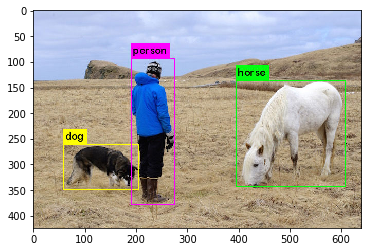

In [8]:
from matplotlib import pyplot as plt
plt.imshow(plt.imread("predictions.jpg"))

### Preparing config files

In [0]:
classes= ['class1', 'class2']

batch=64        # this means we will be using 64 images for every training step
subdivisions=8  # the batch will be divided by 8 to decrease GPU VRAM requirements

#### Creating obj.names file

In [0]:
text= ""
for clas in classes:
    text+=clas+"\n"

with open("cfg/obj.names", "w") as f:
    f.write(text)

In [23]:
! cat cfg/obj.names

class1
class2


#### Creating obj.data file

In [0]:
text= """classes= {}  
train  = train.txt  
valid  = test.txt  
names = obj.names  
backup = backup/ 
""".format(len(classes))

with open("cfg/obj.data", "w") as f:
    f.write(text)

In [25]:
! cat cfg/obj.data

classes= 2  
train  = train.txt  
valid  = test.txt  
names = obj.names  
backup = backup/ 


#### Preparing yolo config file

In [0]:
upload()

Saving train.txt to train.txt


{'train.txt': b'data/obj/pos-1.jpg\r\ndata/obj/pos-100.jpg\r\ndata/obj/pos-101.jpg\r\ndata/obj/pos-102.jpg\r\ndata/obj/pos-103.jpg\r\ndata/obj/pos-104.jpg\r\ndata/obj/pos-105.jpg\r\ndata/obj/pos-106.jpg\r\ndata/obj/pos-107.jpg\r\ndata/obj/pos-109.jpg\r\ndata/obj/pos-110.jpg\r\ndata/obj/pos-111.jpg\r\ndata/obj/pos-112.jpg\r\ndata/obj/pos-113.jpg\r\ndata/obj/pos-114.jpg\r\ndata/obj/pos-115.jpg\r\ndata/obj/pos-116.jpg\r\ndata/obj/pos-117.jpg\r\ndata/obj/pos-119.jpg\r\ndata/obj/pos-12.jpg\r\ndata/obj/pos-120.jpg\r\ndata/obj/pos-121.jpg\r\ndata/obj/pos-122.jpg\r\ndata/obj/pos-123.jpg\r\ndata/obj/pos-124.jpg\r\ndata/obj/pos-125.jpg\r\ndata/obj/pos-126.jpg\r\ndata/obj/pos-128.jpg\r\ndata/obj/pos-129.jpg\r\ndata/obj/pos-13.jpg\r\ndata/obj/pos-130.jpg\r\ndata/obj/pos-131.jpg\r\ndata/obj/pos-132.jpg\r\ndata/obj/pos-133.jpg\r\ndata/obj/pos-134.jpg\r\ndata/obj/pos-135.jpg\r\ndata/obj/pos-137.jpg\r\ndata/obj/pos-138.jpg\r\ndata/obj/pos-139.jpg\r\ndata/obj/pos-14.jpg\r\ndata/obj/pos-140.jpg\r\ndata/

In [0]:
ls

3rdparty/     CMakeLists.txt          include/                results/
appveyor.yml  darknet*                json_mjpeg_streams.sh*  scripts/
backup/       DarknetConfig.cmake.in  LICENSE                 src/
build/        darknet.py              Makefile                video_v2.sh*
build.ps1*    darknet_video.py        net_cam_v3.sh*          video_yolov3.sh*
build.sh*     data/                   obj/                    yolov3.weights
cfg/          image_yolov2.sh*        predictions.jpg
cmake/        image_yolov3.sh*        README.md


In [0]:
! wget https://pjreddie.com/media/files/darknet19_448.conv.23

--2019-07-15 16:25:45--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23’

darknet19_448.conv. 100%[===================>]  75.65M  4.83MB/s    in 73s     

2019-07-15 16:26:59 (1.03 MB/s) - ‘darknet19_448.conv.23’ saved [79327120/79327120]



In [0]:
ls

3rdparty/     CMakeLists.txt          image_yolov3.sh*        README.md
appveyor.yml  darknet*                include/                results/
backup/       darknet19_448.conv.23   json_mjpeg_streams.sh*  scripts/
build/        DarknetConfig.cmake.in  LICENSE                 src/
build.ps1*    darknet.py              Makefile                video_v2.sh*
build.sh*     darknet_video.py        net_cam_v3.sh*          video_yolov3.sh*
cfg/          data/                   obj/                    yolov3.weights
cmake/        image_yolov2.sh*        predictions.jpg


In [0]:
upload()

Saving yolo-voc.cfg to yolo-voc.cfg


{'yolo-voc.cfg': b'[net]\n# Testing\nbatch=64\nsubdivisions=8\n# Training\n# batch=64\n# subdivisions=8\nheight=416\nwidth=416\nchannels=3\nmomentum=0.9\ndecay=0.0005\nangle=0\nsaturation = 1.5\nexposure = 1.5\nhue=.1\n\nlearning_rate=0.001\nburn_in=1000\nmax_batches = 80200\npolicy=steps\nsteps=40000,60000\nscales=.1,.1\n\n[convolutional]\nbatch_normalize=1\nfilters=32\nsize=3\nstride=1\npad=1\nactivation=leaky\n\n[maxpool]\nsize=2\nstride=2\n\n[convolutional]\nbatch_normalize=1\nfilters=64\nsize=3\nstride=1\npad=1\nactivation=leaky\n\n[maxpool]\nsize=2\nstride=2\n\n[convolutional]\nbatch_normalize=1\nfilters=128\nsize=3\nstride=1\npad=1\nactivation=leaky\n\n[convolutional]\nbatch_normalize=1\nfilters=64\nsize=1\nstride=1\npad=1\nactivation=leaky\n\n[convolutional]\nbatch_normalize=1\nfilters=128\nsize=3\nstride=1\npad=1\nactivation=leaky\n\n[maxpool]\nsize=2\nstride=2\n\n[convolutional]\nbatch_normalize=1\nfilters=256\nsize=3\nstride=1\npad=1\nactivation=leaky\n\n[convolutional]\nbat

In [0]:
ls

3rdparty/     CMakeLists.txt          image_yolov3.sh*        README.md
appveyor.yml  darknet*                include/                results/
backup/       darknet19_448.conv.23   json_mjpeg_streams.sh*  scripts/
build/        DarknetConfig.cmake.in  LICENSE                 src/
build.ps1*    darknet.py              Makefile                video_v2.sh*
build.sh*     darknet_video.py        net_cam_v3.sh*          video_yolov3.sh*
cfg/          data/                   obj/                    yolov3.weights
cmake/        image_yolov2.sh*        predictions.jpg         yolo-voc.cfg


In [0]:
cd cfg | ls

[Errno 2] No such file or directory: 'cfg | ls'
/content/darknet


In [0]:
cd cfg

/content/darknet/cfg


In [0]:
ls

9k.labels                     resnet50.cfg
9k.names                      resnext152-32x4d.cfg
9k.tree                       rnn.cfg
alexnet.cfg                   rnn.train.cfg
cifar.cfg                     strided.cfg
cifar.test.cfg                t1.test.cfg
coco9k.map                    test.txt
coco.data                     tiny.cfg
coco.names                    tiny-yolo.cfg
combine9k.data                tiny-yolo-voc.cfg
crnn.train.cfg                tiny-yolo_xnor.cfg
darknet19_448.cfg             train.txt
darknet19.cfg                 vgg-16.cfg
darknet53_448_xnor.cfg        vgg-conv.cfg
darknet53.cfg                 voc.data
darknet.cfg                   writing.cfg
densenet201.cfg               yolo.2.0.cfg
extraction22k.cfg             yolo9000.cfg
extraction.cfg                yolo.cfg
extraction.conv.cfg           yolov1/
go.test.cfg                   yolov2.cfg
gru.cfg                       yolov2-tiny.cfg
imagenet1k.data               yolov2-tiny-voc.cfg
imagenet22k.data

In [0]:
! cat train.txt

data/obj/pos-1.jpg
data/obj/pos-100.jpg
data/obj/pos-101.jpg
data/obj/pos-102.jpg
data/obj/pos-103.jpg
data/obj/pos-104.jpg
data/obj/pos-105.jpg
data/obj/pos-106.jpg
data/obj/pos-107.jpg
data/obj/pos-109.jpg
data/obj/pos-110.jpg
data/obj/pos-111.jpg
data/obj/pos-112.jpg
data/obj/pos-113.jpg
data/obj/pos-114.jpg
data/obj/pos-115.jpg
data/obj/pos-116.jpg
data/obj/pos-117.jpg
data/obj/pos-119.jpg
data/obj/pos-12.jpg
data/obj/pos-120.jpg
data/obj/pos-121.jpg
data/obj/pos-122.jpg
data/obj/pos-123.jpg
data/obj/pos-124.jpg
data/obj/pos-125.jpg
data/obj/pos-126.jpg
data/obj/pos-128.jpg
data/obj/pos-129.jpg
data/obj/pos-13.jpg
data/obj/pos-130.jpg
data/obj/pos-131.jpg
data/obj/pos-132.jpg
data/obj/pos-133.jpg
data/obj/pos-134.jpg
data/obj/pos-135.jpg
data/obj/pos-137.jpg
data/obj/pos-138.jpg
data/obj/pos-139.jpg
data/obj/pos-14.jpg
data/obj/pos-140.jpg
data/obj/pos-141.jpg
data/obj/pos-142.jpg
data/obj/pos-143.jpg
data/obj/pos-144.jpg
data/obj/pos-146.jpg
data/obj/pos-147.jpg
data/obj/pos-148.j

In [0]:
cd data

[Errno 2] No such file or directory: 'data'
/content/darknet/cfg


In [0]:
cd ..

/content/darknet


In [0]:
cd data

/content/darknet/data


In [0]:
mkdir obj

mkdir: cannot create directory ‘obj’: File exists


In [0]:
cd obj

/content/darknet/data/obj


In [0]:
ls

In [0]:
! wget https://timebutt.github.io/content/other/NFPA_dataset.zip

--2019-07-15 16:31:23--  https://timebutt.github.io/content/other/NFPA_dataset.zip
Resolving timebutt.github.io (timebutt.github.io)... 185.199.109.153, 185.199.108.153, 185.199.110.153, ...
Connecting to timebutt.github.io (timebutt.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20442422 (19M) [application/zip]
Saving to: ‘NFPA_dataset.zip’

NFPA_dataset.zip    100%[===================>]  19.50M  --.-KB/s    in 0.07s   

2019-07-15 16:31:24 (266 MB/s) - ‘NFPA_dataset.zip’ saved [20442422/20442422]



In [0]:
! unzip NFPA_dataset.zip 

Archive:  NFPA_dataset.zip
   creating: NFPA dataset/
  inflating: NFPA dataset/pos-1.jpg  
  inflating: NFPA dataset/pos-1.txt  
  inflating: NFPA dataset/pos-100.jpg  
  inflating: NFPA dataset/pos-100.txt  
  inflating: NFPA dataset/pos-101.jpg  
  inflating: NFPA dataset/pos-101.txt  
  inflating: NFPA dataset/pos-102.jpg  
  inflating: NFPA dataset/pos-102.txt  
  inflating: NFPA dataset/pos-103.jpg  
  inflating: NFPA dataset/pos-103.txt  
  inflating: NFPA dataset/pos-104.jpg  
  inflating: NFPA dataset/pos-104.txt  
  inflating: NFPA dataset/pos-105.jpg  
  inflating: NFPA dataset/pos-105.txt  
  inflating: NFPA dataset/pos-106.jpg  
  inflating: NFPA dataset/pos-106.txt  
  inflating: NFPA dataset/pos-107.jpg  
  inflating: NFPA dataset/pos-107.txt  
  inflating: NFPA dataset/pos-108.jpg  
  inflating: NFPA dataset/pos-108.txt  
  inflating: NFPA dataset/pos-109.jpg  
  inflating: NFPA dataset/pos-109.txt  
  inflating: NFPA dataset/pos-110.jpg  
  inflating: NFPA dataset/pos-

In [0]:
ls

'NFPA dataset'/   NFPA_dataset.zip


In [0]:
! mv 'NFPA dataset'/* .

In [0]:
ls

'NFPA dataset'/     pos-153.jpg   pos-204.jpg   pos-260.jpg   pos-45.jpg
 NFPA_dataset.zip   pos-153.txt   pos-204.txt   pos-260.txt   pos-45.txt
 pos-100.jpg        pos-154.jpg   pos-205.jpg   pos-261.jpg   pos-46.jpg
 pos-100.txt        pos-154.txt   pos-205.txt   pos-261.txt   pos-46.txt
 pos-101.jpg        pos-155.jpg   pos-206.jpg   pos-262.jpg   pos-47.jpg
 pos-101.txt        pos-155.txt   pos-206.txt   pos-262.txt   pos-47.txt
 pos-102.jpg        pos-156.jpg   pos-207.jpg   pos-263.jpg   pos-48.jpg
 pos-102.txt        pos-156.txt   pos-207.txt   pos-263.txt   pos-48.txt
 pos-103.jpg        pos-157.jpg   pos-208.jpg   pos-264.jpg   pos-49.jpg
 pos-103.txt        pos-157.txt   pos-208.txt   pos-264.txt   pos-49.txt
 pos-104.jpg        pos-158.jpg   pos-209.jpg   pos-265.jpg   pos-50.jpg
 pos-104.txt        pos-158.txt   pos-209.txt   pos-265.txt   pos-50.txt
 pos-105.jpg        pos-159.jpg   pos-20.jpg    pos-266.jpg   pos-51.jpg
 pos-105.txt        pos-159.txt   pos-20.txt    pos

In [0]:
! rm -rf NFPA_dataset.zip

In [0]:
! rm -rf 'NFPA dataset'

In [0]:
ls

pos-100.jpg  pos-145.txt  pos-189.jpg  pos-235.txt  pos-279.jpg  pos-55.txt
pos-100.txt  pos-146.jpg  pos-189.txt  pos-236.jpg  pos-279.txt  pos-56.jpg
pos-101.jpg  pos-146.txt  pos-18.jpg   pos-236.txt  pos-27.jpg   pos-56.txt
pos-101.txt  pos-147.jpg  pos-18.txt   pos-237.jpg  pos-27.txt   pos-57.jpg
pos-102.jpg  pos-147.txt  pos-190.jpg  pos-237.txt  pos-280.jpg  pos-57.txt
pos-102.txt  pos-148.jpg  pos-190.txt  pos-238.jpg  pos-280.txt  pos-58.jpg
pos-103.jpg  pos-148.txt  pos-191.jpg  pos-238.txt  pos-281.jpg  pos-58.txt
pos-103.txt  pos-149.jpg  pos-191.txt  pos-239.jpg  pos-281.txt  pos-59.jpg
pos-104.jpg  pos-149.txt  pos-192.jpg  pos-239.txt  pos-282.jpg  pos-59.txt
pos-104.txt  pos-14.jpg   pos-192.txt  pos-23.jpg   pos-282.txt  pos-60.jpg
pos-105.jpg  pos-14.txt   pos-193.jpg  pos-23.txt   pos-283.jpg  pos-60.txt
pos-105.txt  pos-150.jpg  pos-193.txt  pos-240.jpg  pos-283.txt  pos-61.jpg
pos-106.jpg  pos-150.txt  pos-194.jpg  pos-240.txt  pos-284.jpg  pos-61.txt
pos-106.txt 

In [0]:
pwd

'/content/darknet/data/obj'

In [0]:
cd ..

/content/darknet/data


In [0]:
cd ..

/content/darknet


In [0]:
ls

3rdparty/     CMakeLists.txt          image_yolov3.sh*        README.md
appveyor.yml  darknet*                include/                results/
backup/       darknet19_448.conv.23   json_mjpeg_streams.sh*  scripts/
build/        DarknetConfig.cmake.in  LICENSE                 src/
build.ps1*    darknet.py              Makefile                video_v2.sh*
build.sh*     darknet_video.py        net_cam_v3.sh*          video_yolov3.sh*
cfg/          data/                   obj/                    yolov3.weights
cmake/        image_yolov2.sh*        predictions.jpg         yolo-voc.cfg


In [0]:
mkdir cfg/backup

In [0]:
! ./darknet detector train ./cfg/obj.data yolo-voc.cfg darknet19_448.conv.23 -dont_show

yolo-voc
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max               2 x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max               2 x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max               2 x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
   9 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  52 x 128 0.177 BF
  10 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
  11 max               2 x 2/ 2     52 x  5

In [0]:
cd backup

/content/darknet/backup


In [0]:
cd ..

/content/darknet


In [0]:
! ./darknet detector test ./cfg/obj.data yolo-voc.cfg ./backup/yolo-voc_last.weights data/obj/pos-207.jpg -dont_show

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max               2 x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max               2 x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max               2 x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
   9 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  52 x 128 0.177 BF
  10 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
  11 max               2 x 2/ 2     52 x  52 x 256 -

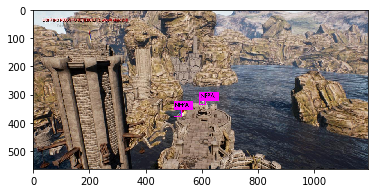

In [0]:
plt.imshow(plt.imread("predictions.jpg"))

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! ./darknet detector train ./cfg/obj.data yolo-voc.cfg ./backup/yolo-voc_last.weights -dont_show

yolo-voc
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max               2 x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max               2 x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max               2 x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
   9 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  52 x 128 0.177 BF
  10 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
  11 max               2 x 2/ 2     52 x  5

In [0]:
ls

3rdparty/     cmake/                  image_yolov3.sh*        results/
appveyor.yml  CMakeLists.txt          include/                scripts/
backup/       darknet*                json_mjpeg_streams.sh*  src/
bad.list      darknet19_448.conv.23   LICENSE                 video_v2.sh*
build/        DarknetConfig.cmake.in  Makefile                video_yolov3.sh*
build.ps1*    darknet.py              net_cam_v3.sh*          yolov3.weights
build.sh*     darknet_video.py        obj/                    yolo-voc.cfg
cfg/          data/                   predictions.jpg
chart.png     image_yolov2.sh*        README.md


In [0]:
cd ..

/content


In [0]:
ls

darknet/  drive/  sample_data/


In [0]:
cp ./darknet/backup/yolo-voc_1000.weights ./drive/'My Drive'/ColabFiles

In [0]:
mkdir drive/'My Drive'/ColabFiles